In [195]:
#Getting library files into our program
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
#storing client data sheet values in dataset variable
dataset = pd.read_csv("insurance_pre.csv")

In [197]:
#display the dataset
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [198]:
#display the dataset columns
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

In [199]:
#removing dummies using pandas get_dummies method
dataset = pd.get_dummies(dataset, drop_first = True)

In [200]:
#display dataset values post removing dummies
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [201]:
#display column names post removing dummies
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [202]:
#assigning the input and output datas to independent, dependent variables
independent = dataset[['age', 'bmi', 'children', 'sex_male', 'smoker_yes']]
dependent = dataset[['charges']]

In [203]:
#display the input data stored in independent variable
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [204]:
#display the output data stored in dependent variable
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [205]:
#display the shape of input data
independent.shape

(1338, 5)

In [206]:
#display the shape of output data
dependent

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [207]:
#selecting the model and splitting the training, test set data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(independent, dependent, test_size = 0.30, random_state = 0)

In [208]:
#display the training set data
X_train

,age,bmi,children,sex_male,smoker_yes
1163,18,28.215,0,False,False
196,39,32.800,0,False,False
438,52,46.750,5,False,False
183,44,26.410,0,False,False
1298,33,27.455,2,True,False
...,...,...,...,...,...
763,27,26.030,0,True,False
835,42,35.970,2,True,False
1216,40,25.080,0,True,False
559,19,35.530,0,True,False


In [209]:
#display the test set data
X_test

,age,bmi,children,sex_male,smoker_yes
578,52,30.200,1,True,False
610,47,29.370,1,False,False
569,48,40.565,2,True,True
1034,61,38.380,0,True,False
198,51,18.050,0,False,False
...,...,...,...,...,...
1261,28,37.100,1,True,False
494,21,25.700,4,True,True
97,55,38.280,0,True,False
418,64,39.160,1,True,False


In [210]:
#from sklearn tree model we are getting DecisionTreeRegression model here.
#to the regressor varibale we are assigning the DecisionTreeRegressor method values.
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion = 'friedman_mse', splitter = 'random')
regressor = regressor.fit(X_train, y_train)

In [211]:
#display the regressor value method
regressor

DecisionTreeRegressor(criterion='friedman_mse', splitter='random')

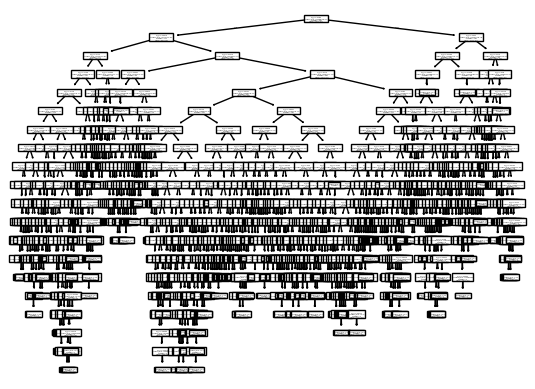

In [212]:
#from sklearn getting tree model here
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [213]:
#predicting test set data and assigning the results to y_pred variable
y_pred = regressor.predict(X_test)

In [214]:
#from sklearn getting evaluation metrics and stroing the results to r_score variable
from sklearn.metrics import r2_score
r_score = r2_score(y_test, y_pred)

In [215]:
#display the r_score value
r_score

0.7168278124538013

In [216]:
#getting pickle library for deployment phase
import pickle

In [217]:
#saving the model to filename variable
filename = "finalized-model_DecisionTreeRegressorAssignment_friedman_mse_random.sav"

In [218]:
#using pickle dump method we are writing the file on disk
pickle.dump(regressor, open(filename, 'wb'))

In [219]:
#loading the saved model to loaded_model variable
loaded_model = pickle.load(open("finalized-model_DecisionTreeRegressorAssignment_friedman_mse_random.sav", 'rb'))

In [220]:
#here we are pedicting the value like we want and assigning to result variable.
result = loaded_model.predict([[42, 45.56, 2, True, False]])

C:\Anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [221]:
#displaying the predicted value for the given 5 values.
result

array([7162.0122])